In [1]:
#pandas - data manipulation
#matplotlib and seaborn - data visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("india_job_market_dataset.csv")
df

,Job ID,Job Title,Company Name,Job Location,Job Type,Salary Range,Experience Required,Posted Date,Application Deadline,Job Portal,Number of Applicants,Education Requirement,Skills Required,Remote/Onsite,Company Size
0,JOB1,Software Engineer,Amazon,Ahmedabad,Full-time,5-8 LPA,2-5 years,2025-01-16,2025-01-25,LinkedIn,23,PhD,"C++, SQL, Python",Remote,Small (1-50)
1,JOB2,Marketing Executive,Infosys,Ahmedabad,Internship,5-8 LPA,2-5 years,2024-12-25,2025-01-19,Indeed,462,MBA,"SQL, C++, Python",Remote,Large (500+)
2,JOB3,Financial Analyst,Deloitte,Jaipur,Contract,20+ LPA,5-10 years,2025-01-22,2025-01-29,Naukri.com,430,M.Tech,"Machine Learning, Excel, React",Remote,Large (500+)
3,JOB4,Business Analyst,Amazon,Delhi,Full-time,20+ LPA,2-5 years,2025-01-07,2025-02-06,LinkedIn,387,B.Tech,"Machine Learning, Python, SQL",Hybrid,Small (1-50)
4,JOB5,Software Engineer,Infosys,Delhi,Full-time,12-20 LPA,10+ years,2024-12-26,2025-01-08,Indeed,199,MBA,"UI/UX, C++, Java",Onsite,Small (1-50)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,JOB19996,Marketing Executive,Deloitte,Pune,Full-time,5-8 LPA,2-5 years,2025-01-13,2025-02-05,Indeed,171,PhD,"Machine Learning, Python, AWS",Remote,Small (1-50)
19996,JOB19997,Business Analyst,Accenture,Bangalore,Internship,20+ LPA,0-2 years,2025-01-08,2025-01-27,LinkedIn,482,MBA,"Digital Marketing, React, Machine Learning",Onsite,Medium (51-500)
19997,JOB19998,Graphic Designer,Wipro,Jaipur,Part-time,5-8 LPA,5-10 years,2024-12-26,2025-01-16,Naukri.com,319,PhD,"Machine Learning, Excel, Digital Marketing",Onsite,Small (1-50)
19998,JOB19999,Sales Representative,Infosys,Kolkata,Internship,12-20 LPA,2-5 years,2025-01-20,2025-02-09,Naukri.com,178,M.Tech,"Excel, C++, React",Onsite,Large (500+)


In [52]:
df.columns

Index(['Job ID', 'Job Title', 'Company Name', 'Job Location', 'Job Type',
       'Salary Range', 'Experience Required', 'Posted Date',
       'Application Deadline', 'Job Portal', 'Number of Applicants',
       'Education Requirement', 'Skills Required', 'Remote/Onsite',
       'Company Size'],
      dtype='object')

# Job Market Trends:

# What are the most in-demand job roles? 

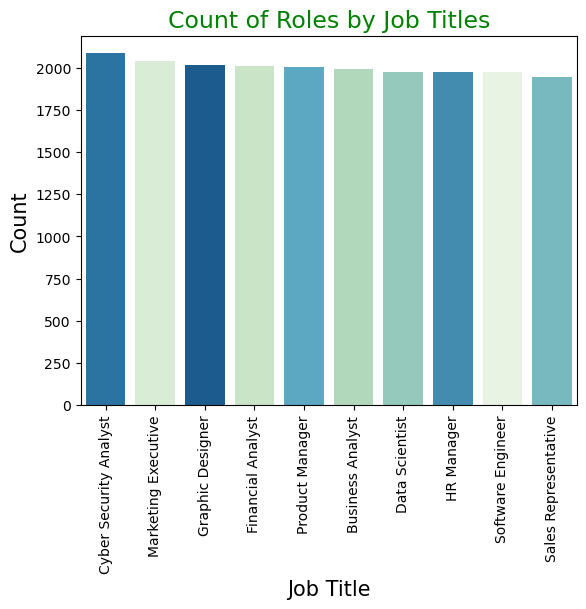

In [40]:
sns.countplot(x = "Job Title", data = df, hue = "Job Title", palette = 'GnBu', order=df['Job Title'].value_counts().index) #for creating plot
plt.xticks(rotation = 90) #for stopping the overlapping od labels
plt.xlabel("Job Title", fontsize = 15) #to increase fontsize in x-axis
plt.ylabel("Count", fontsize = 15) #to increase fontsize in y-axis
plt.title("Count of Roles by Job Titles", fontsize = 17, color = "green") #to define the title
plt.show() #to display the chart

# Which companies are posting the most job openings? 

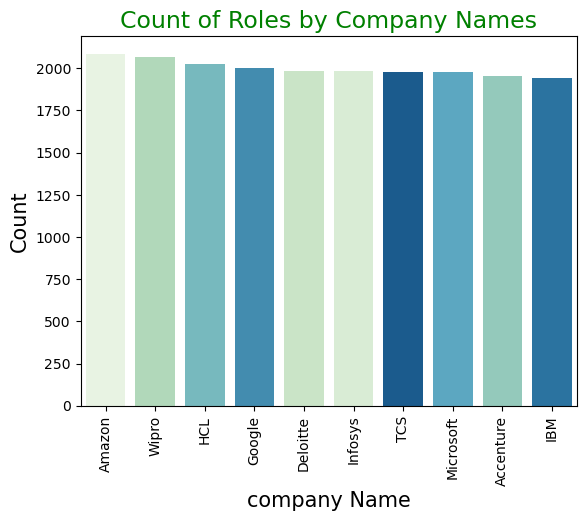

In [42]:
sns.countplot(x = "Company Name", data = df, hue = "Company Name", palette = 'GnBu', order=df['Company Name'].value_counts().index) #for creating plot
plt.xticks(rotation = 90) #for stopping the overlapping od labels
plt.xlabel("company Name", fontsize = 15) #to increase fontsize in x-axis
plt.ylabel("Count", fontsize = 15) #to increase fontsize in y-axis
plt.title("Count of Roles by Company Names", fontsize = 17, color = "green") #to define the title
plt.show() #to display the chart

# What is the distribution of job types?

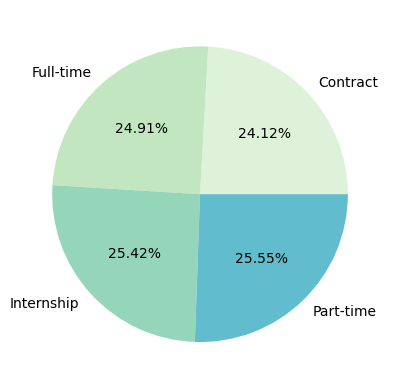

In [32]:
gb = df.groupby("Job Type").agg({"Job ID":"count"}) #to create summary like pivot table
plt.pie(gb['Job ID'], labels = gb.index, autopct = "%1.2f%%" ,  colors=sns.color_palette('GnBu')) #to create a pic chart in matplotlib
plt.show()

# Salary and Experience Analysis:

# What is the distribution of salary ranges across different job roles?

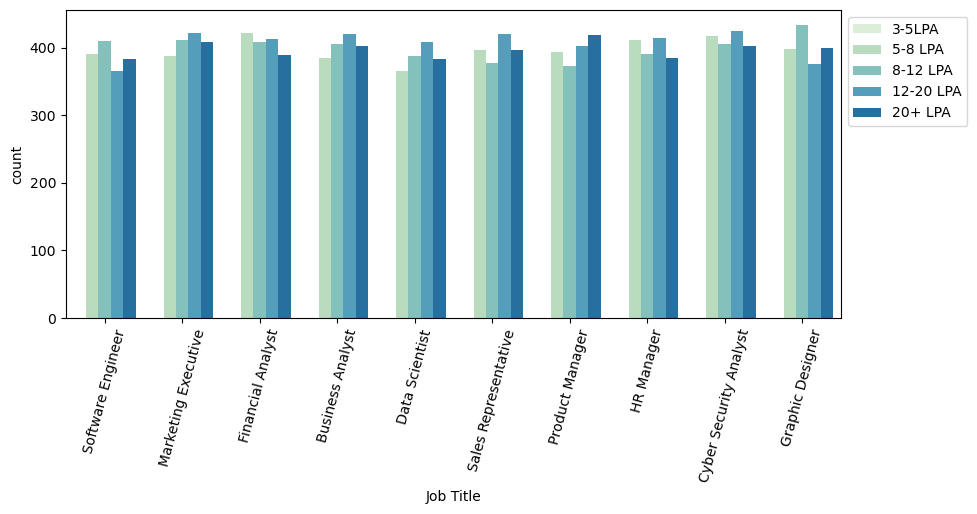

In [46]:
plt.figure(figsize = (10,4)) #to change the size of the figure
sns.countplot(x = "Job Title", data = df, hue = "Salary Range", palette = "GnBu", hue_order = ["3-5LPA", "5-8 LPA", "8-12 LPA", "12-20 LPA", "20+ LPA"],)
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor = (1,1)) #bbox is used to keep the legend outside the graph
plt.show()

# What is the average experience required for different job types? 

     Job Type  Avg Experience
0    Contract        4.292142
1   Full-time        4.283076
2  Internship        4.265487
3   Part-time        4.247897


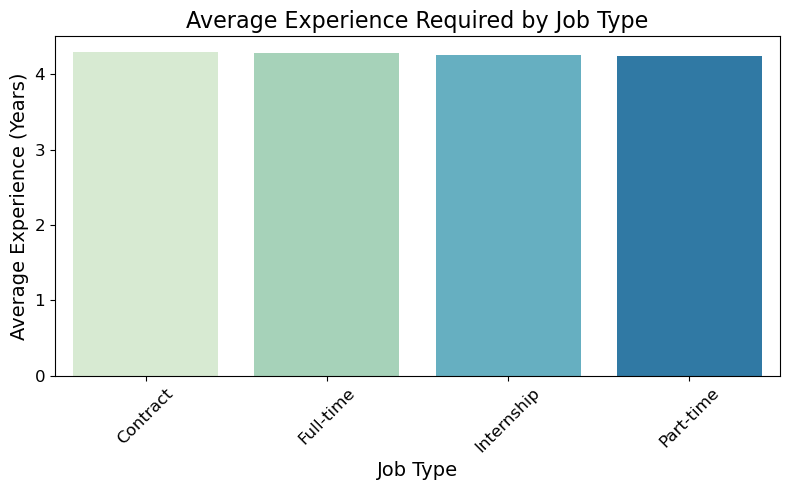

In [91]:
df['Avg Experience'] = df['Experience Required'].apply(
    lambda x: float(x.split('-')[0]) if '-' in x else float(x.split('+')[0])
)

average_experience = df.groupby('Job Type')['Avg Experience'].mean().reset_index() # Calculate the average experience
print(average_experience)

plt.figure(figsize=(8, 5))
sns.barplot(
    x='Job Type', 
    y='Avg Experience', 
    hue='Job Type',
    data=average_experience, 
    palette="GnBu"
)


plt.title('Average Experience Required by Job Type', fontsize=16)
plt.xlabel('Job Type', fontsize=14)
plt.ylabel('Average Experience (Years)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


# Show the plot
plt.tight_layout()
plt.show()

# Which salary range has the highest number of job postings?

The salary range with the highest number of job postings is '12-20 LPA' with 4066 postings.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21676\201944733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_counts.index, y=salary_counts.values, palette="GnBu")


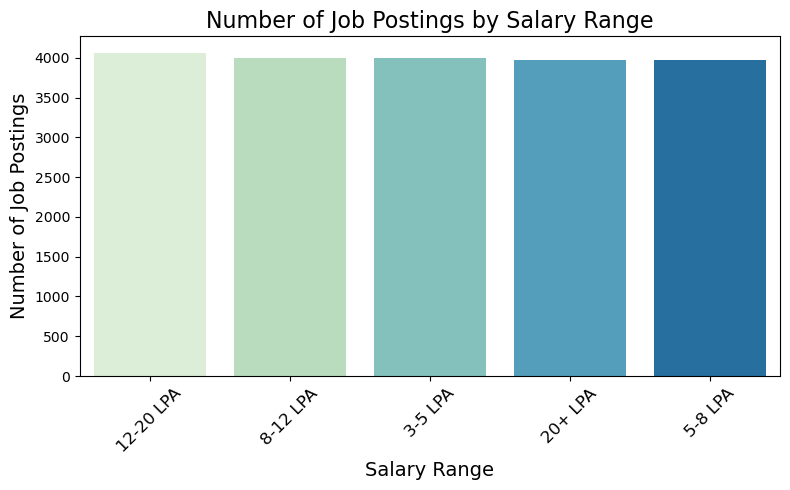

In [239]:
salary_counts = df['Salary Range'].value_counts()

most_common_salary = salary_counts.idxmax() # Finding the salary range
highest_postings = salary_counts.max()


print(f"The salary range with the highest number of job postings is '{most_common_salary}' with {highest_postings} postings.")

plt.figure(figsize=(8, 5))
sns.barplot(x=salary_counts.index, y=salary_counts.values, palette="GnBu")


plt.title('Number of Job Postings by Salary Range', fontsize=16)
plt.xlabel('Salary Range', fontsize=14)
plt.ylabel('Number of Job Postings', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Location Insights:

# Which cities have the highest number of job opportunities?

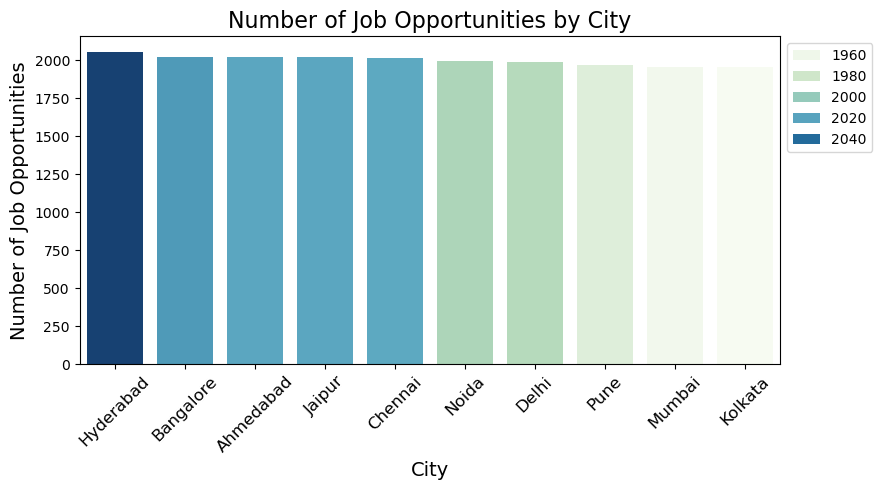

In [241]:
city_counts = df['Job Location'].value_counts()


plt.figure(figsize=(8, 5))
sns.barplot(x=city_counts.index, y=city_counts.values,hue=city_counts, palette="GnBu")


plt.title('Number of Job Opportunities by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Job Opportunities', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.legend(bbox_to_anchor = (1,1))
plt.show()

# What are the most common job types in each location?

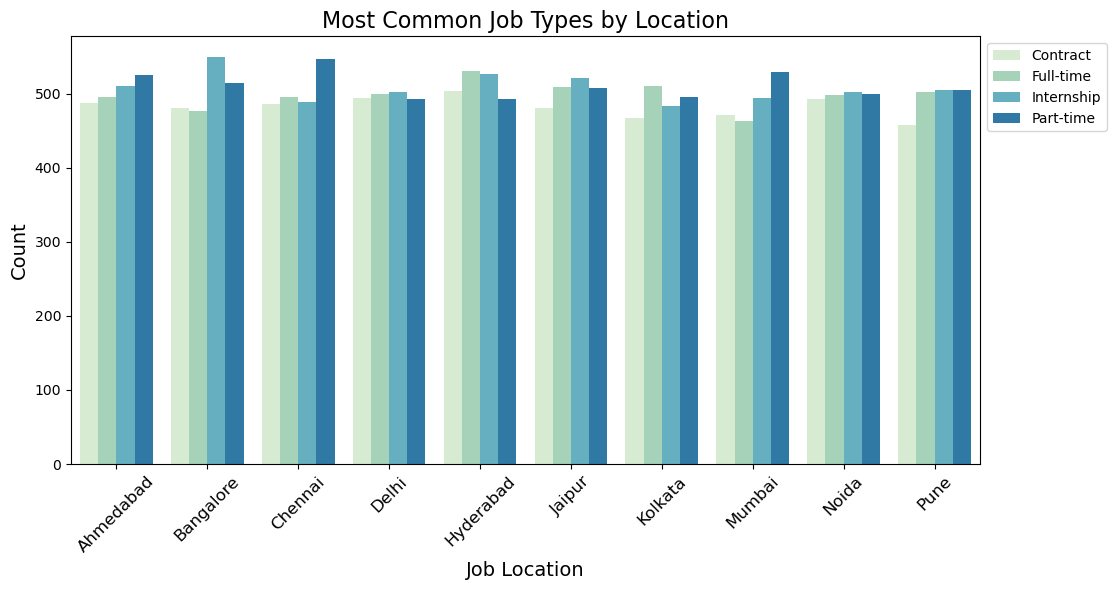

In [118]:
job_type_counts = df.groupby(['Job Location', 'Job Type']).size().reset_index(name='Count')

# Finding the most common job type in each location
most_common_job_types = job_type_counts.loc[job_type_counts.groupby('Job Location')['Count'].idxmax()]

plt.figure(figsize=(10, 6))
sns.barplot(x='Job Location', y='Count', hue='Job Type', data=job_type_counts, palette='GnBu')
plt.title('Most Common Job Types by Location', fontsize=16)
plt.xlabel('Job Location', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Job Type', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.legend(bbox_to_anchor = (1,1))
plt.show()

# Skills and Education Analysis:

# Which skills are most frequently required in job postings? 

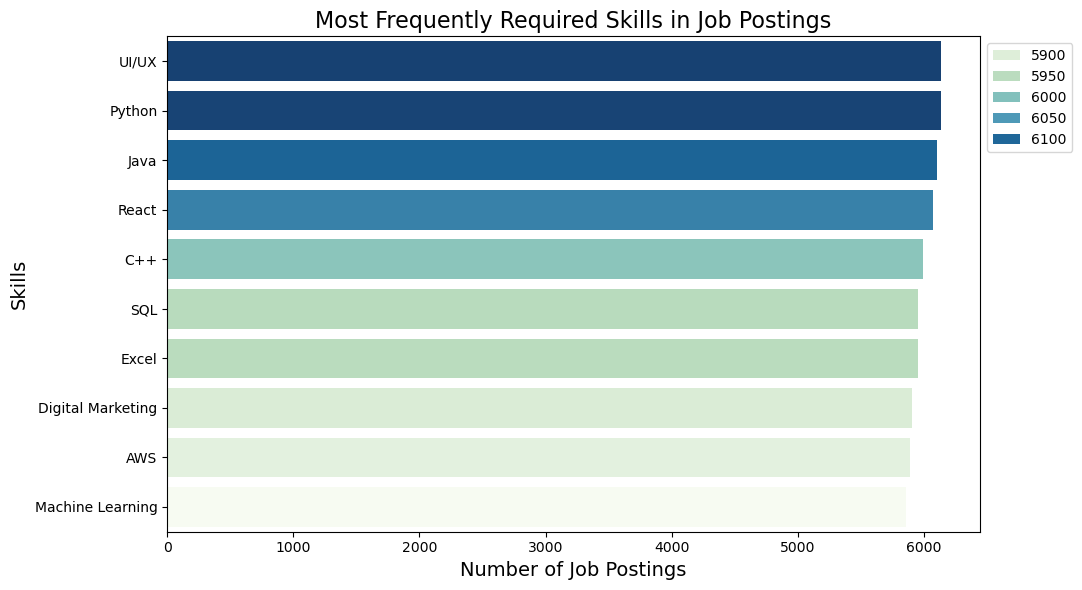

In [126]:
skills_series = df['Skills Required'].str.split(', ').explode()

# Counting the occurrences of each skill
skill_counts = skills_series.value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=skill_counts.values, y=skill_counts.index,hue=skill_counts, palette="GnBu")

# Customizing the plot
plt.title('Most Frequently Required Skills in Job Postings', fontsize=16)
plt.xlabel('Number of Job Postings', fontsize=14)
plt.ylabel('Skills', fontsize=14)
plt.tight_layout()
plt.legend(bbox_to_anchor = (1,1))
plt.show()

# What is the correlation between educational qualifications and salary ranges?

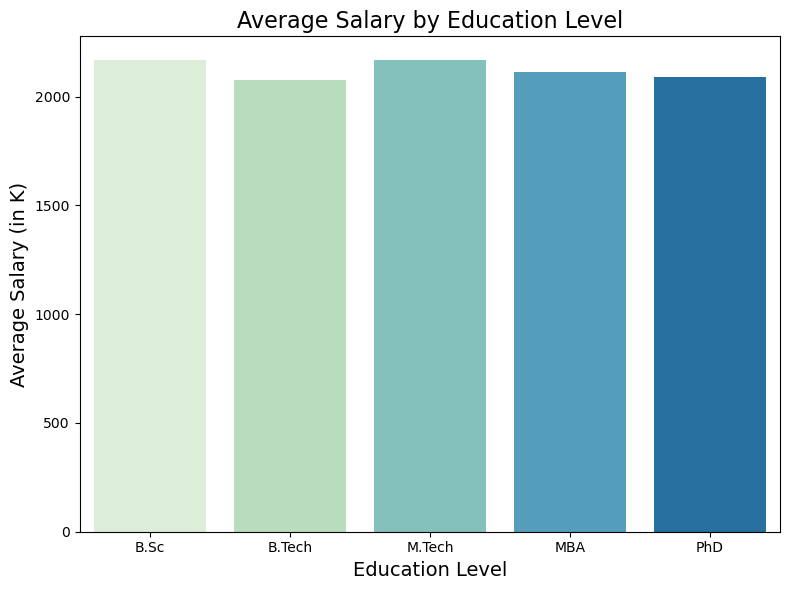

In [159]:
# Function to convert salary range to numeric
def salary_to_numeric(salary_range):
    if 'LPA' in salary_range:
        if '-' in salary_range:
            min_salary, max_salary = salary_range.split('-')
            min_salary = int(min_salary.replace(' LPA', '').strip()) * 100
            max_salary = int(max_salary.replace(' LPA', '').strip()) * 100
            return (min_salary + max_salary) / 2
        elif '+' in salary_range:
            salary = int(salary_range.split('+')[0].replace(' LPA', '').strip()) * 100
            return salary + 5000  # Approximate +5K for the '+'
        else:
            salary = int(salary_range.replace(' LPA', '').strip()) * 100
            return salary
    else:
        # Handling for 'K' salary ranges
        min_salary, max_salary = salary_range.split('-')
        min_salary = int(min_salary.replace('K', '').strip())
        max_salary = int(max_salary.replace('K', '').strip())
        return (min_salary + max_salary) / 2

# Apply the function to the 'Salary Range' column
df['Salary Numeric'] = df['Salary Range'].apply(salary_to_numeric)

# Calculate the average salary for each education level
avg_salary_by_education = df.groupby('Education Requirement')['Salary Numeric'].mean().reset_index()

# Create a bar plot to show the average salary by education level
plt.figure(figsize=(8, 6))
sns.barplot(x='Education Requirement', y='Salary Numeric',hue = 'Education Requirement', data=avg_salary_by_education ,palette='GnBu')

# Add titles and labels
plt.title('Average Salary by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Average Salary (in K)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Which education level is most demanded for different job roles?

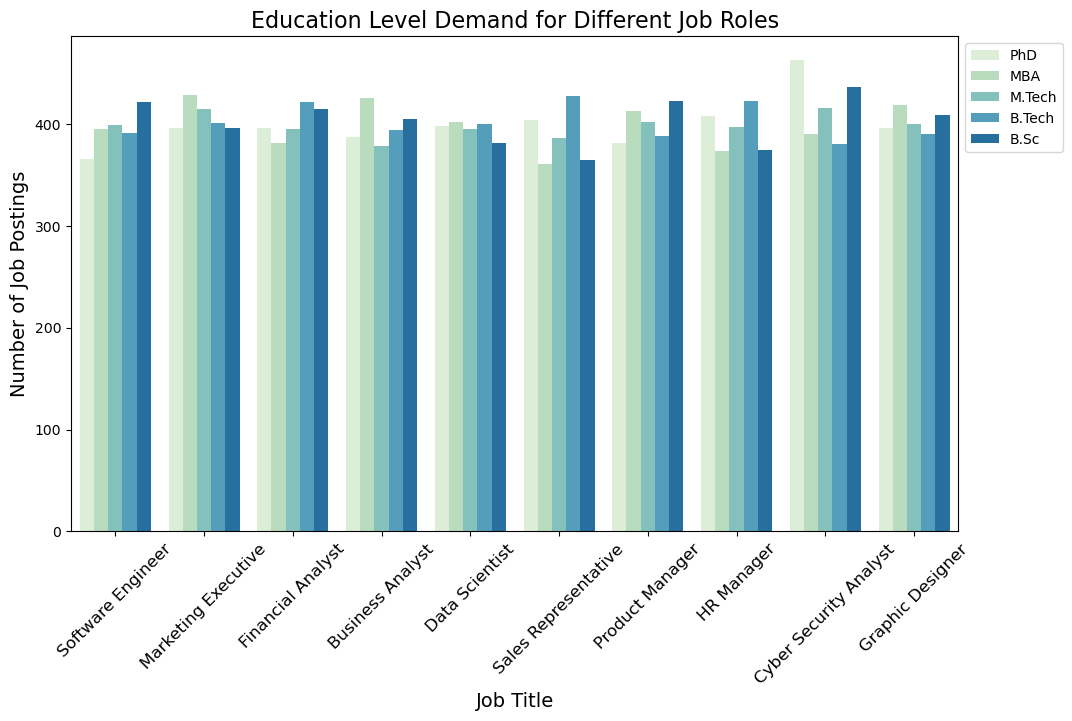

In [166]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Job Title', hue='Education Requirement', data=df, palette='GnBu')

# Add titles and labels
plt.title('Education Level Demand for Different Job Roles', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Number of Job Postings', fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45, fontsize=12)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

# Hiring Timeline:

# How does the number of job postings vary by month? (Line chart of postings over time)

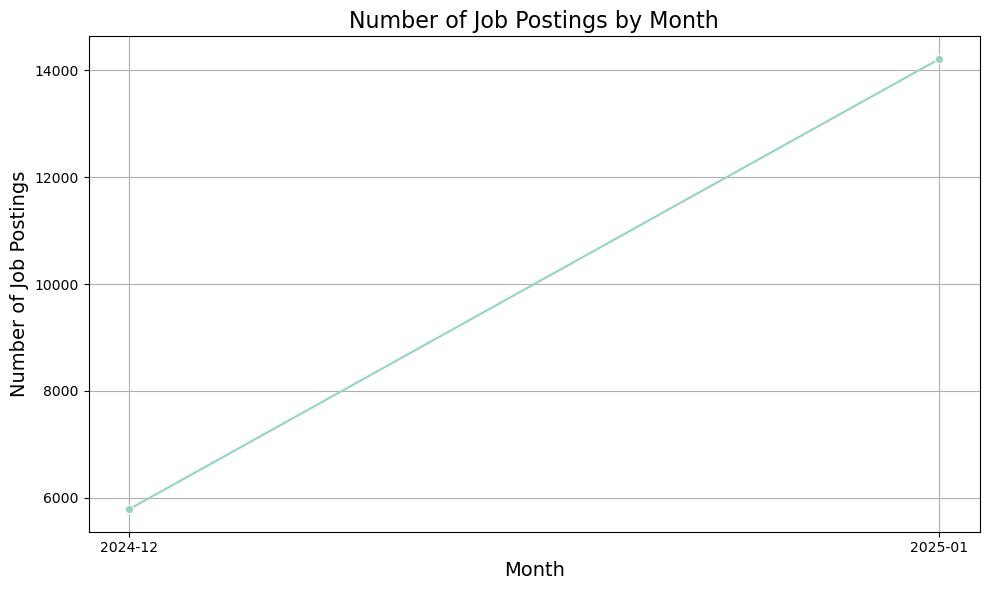

In [178]:
df['Posted Date'] = pd.to_datetime(df['Posted Date'])

# Extract month and year from the 'Posted Date' column
df['Year-Month'] = df['Posted Date'].dt.to_period('M')

# Group by 'Year-Month' and count the number of job postings for each month
monthly_postings = df.groupby('Year-Month').size()

# Create the line chart with the 'GnBu' color palette
plt.figure(figsize=(10, 6))

# Use a color from the GnBu palette for the line
sns.lineplot(x=monthly_postings.index.astype(str), y=monthly_postings.values, marker='o', color=sns.color_palette("GnBu")[2])

# Add titles and labels
plt.title('Number of Job Postings by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Job Postings', fontsize=14)

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()

# What is the average duration between job posting and application deadline? (Histogram)

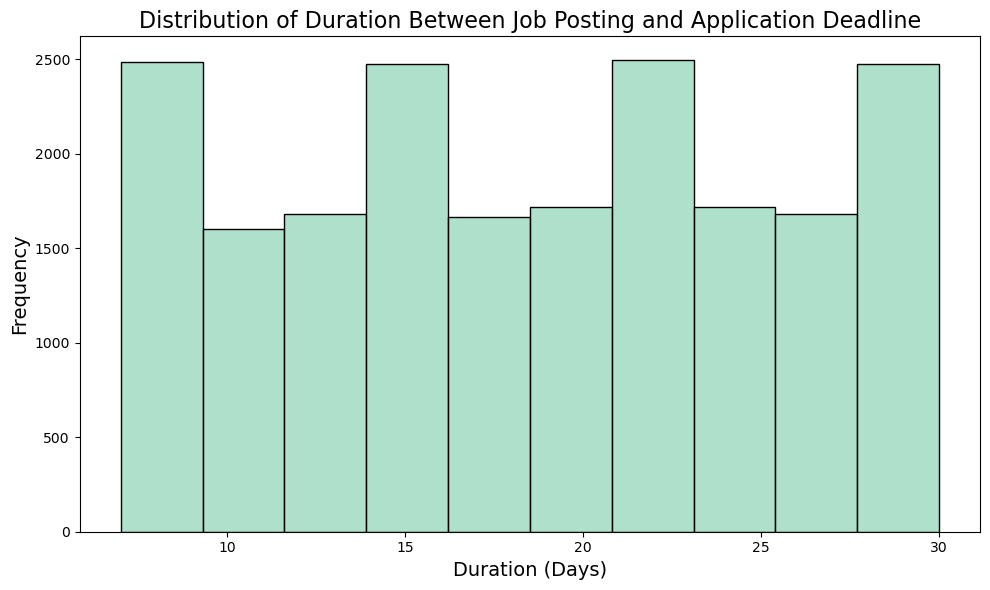

Average Duration Between Job Posting and Application Deadline: 18.56 days


In [189]:
# Convert 'Posted Date' and 'Application Deadline' to datetime format
df['Posted Date'] = pd.to_datetime(df['Posted Date'])
df['Application Deadline'] = pd.to_datetime(df['Application Deadline'])

# Calculate the duration (in days) between 'Posted Date' and 'Application Deadline'
df['Duration (Days)'] = (df['Application Deadline'] - df['Posted Date']).dt.days

# Plotting the histogram of the durations with 'GnBu' color palette
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration (Days)'], bins=10, color=sns.color_palette("GnBu")[2], kde=False)

# Add titles and labels
plt.title('Distribution of Duration Between Job Posting and Application Deadline', fontsize=16)
plt.xlabel('Duration (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Calculate and print the average duration
avg_duration = df['Duration (Days)'].mean()
print(f"Average Duration Between Job Posting and Application Deadline: {avg_duration:.2f} days")

# Application Trends:

# Which job portals are attracting the highest number of applicants?

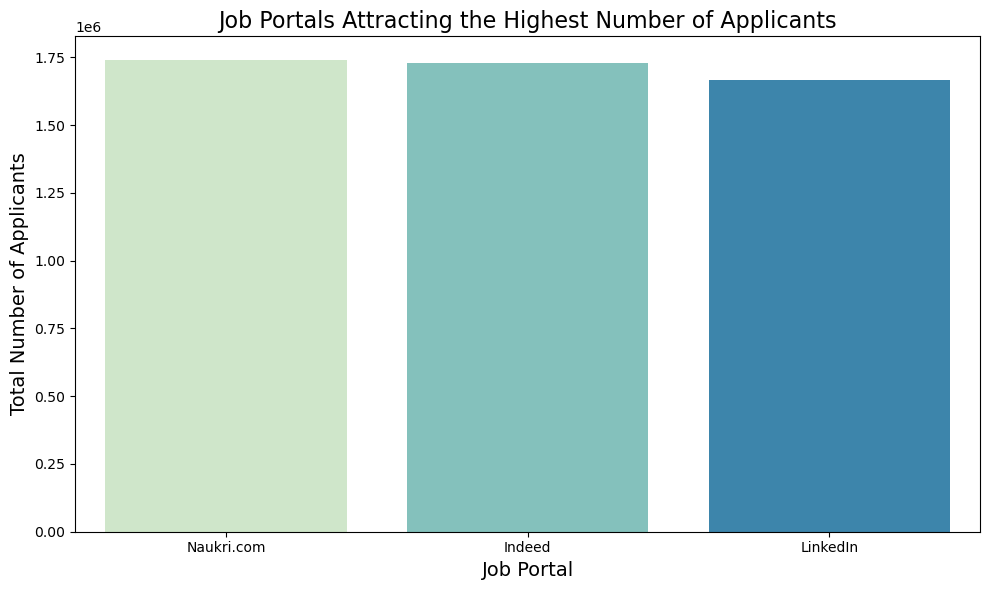

In [197]:
# Group by 'Job Portal' and sum the 'Number of Applicants'
portal_applicants = df.groupby('Job Portal')['Number of Applicants'].sum().reset_index()

# Sort by the number of applicants in descending order
portal_applicants = portal_applicants.sort_values(by='Number of Applicants', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Job Portal', y='Number of Applicants', data=portal_applicants,hue='Job Portal', palette='GnBu')

# Add titles and labels
plt.title('Job Portals Attracting the Highest Number of Applicants', fontsize=16)
plt.xlabel('Job Portal', fontsize=14)
plt.ylabel('Total Number of Applicants', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Which job titles receive the most applications? 


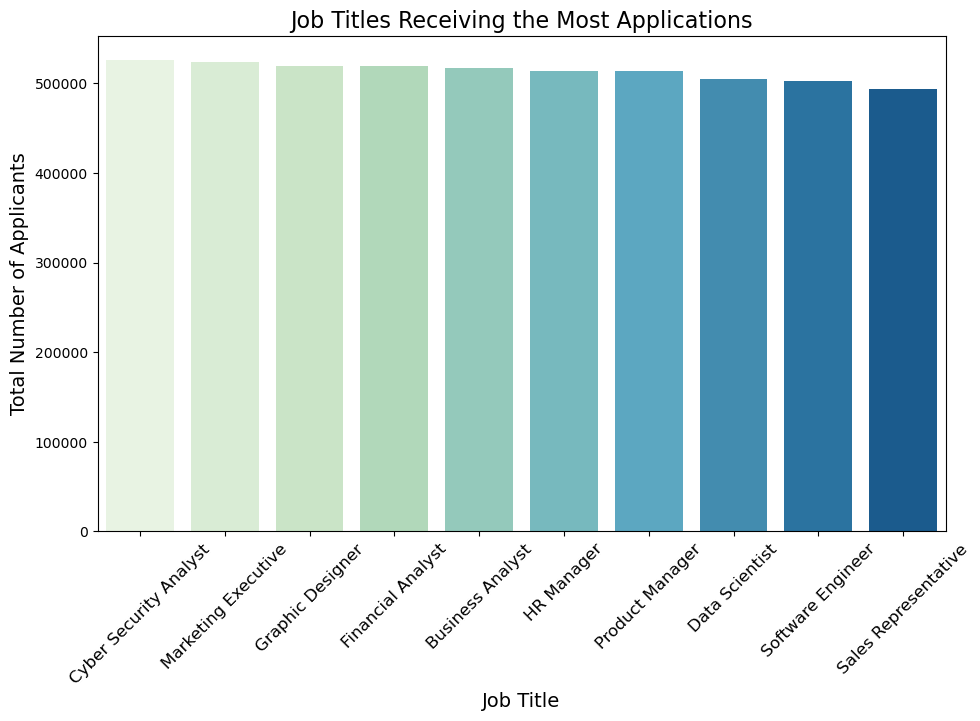

In [206]:
# Group by 'Job Title' and sum the 'Number of Applicants'
title_applicants = df.groupby('Job Title')['Number of Applicants'].sum().reset_index()

# Sort by the number of applicants in descending order
title_applicants = title_applicants.sort_values(by='Number of Applicants', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Job Title', y='Number of Applicants', data=title_applicants,hue= 'Job Title', palette='GnBu')

# Add titles and labels
plt.title('Job Titles Receiving the Most Applications', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Total Number of Applicants', fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45, fontsize=12)
plt.show()

# Company Analysis:

# What is the distribution of job postings by company size? 

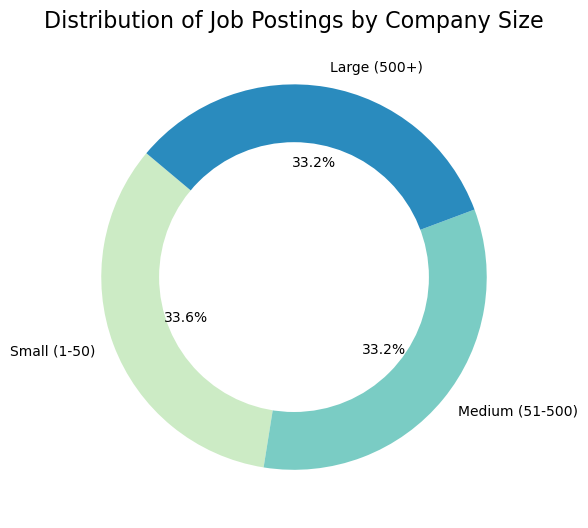

In [220]:
# Count the number of job postings by company size
company_size_distribution = df['Company Size'].value_counts()

# Generate distinct colors from the GnBu palette
colors = sns.color_palette("GnBu", n_colors=len(company_size_distribution))

# Donut Chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    company_size_distribution.values,
    labels=company_size_distribution.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors  # Use distinct colors from the GnBu palette
)

# Add a circle at the center to create a donut shape
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add title and layout adjustments
plt.title('Distribution of Job Postings by Company Size', fontsize=16)
plt.tight_layout()
plt.show()

# Which companies offer the most remote work opportunities? 

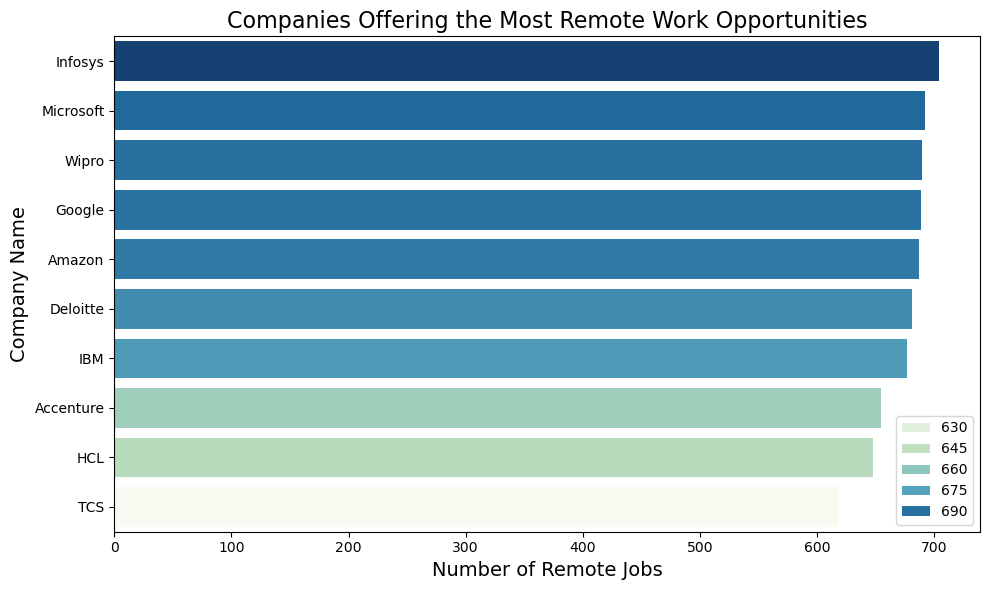

In [227]:
# Filter for remote jobs
remote_jobs = df[df['Remote/Onsite'] == 'Remote']

# Count the number of remote jobs offered by each company
remote_job_counts = remote_jobs['Company Name'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(
    x=remote_job_counts.values,
    y=remote_job_counts.index,
    hue= remote_job_counts.values,
    palette="GnBu"
)

# Add titles and labels
plt.title('Companies Offering the Most Remote Work Opportunities', fontsize=16)
plt.xlabel('Number of Remote Jobs', fontsize=14)
plt.ylabel('Company Name', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()